# **Financial Applicactions with ML & AI**

<img style="float: right;" src="https://github.com/torreblanca99/course_financial_applications/blob/develop/docs/img/logo_bourbaki.png?raw=1" width="100"/>

## **Module III:** AI & Finance
#### Topic: Using a LLM

##### Name: Julio César Avila Torreblanca

- **Objective**: fine tuning a LLM (BERT).
- **Contents**:
    - Notes:
        - Large Lenguage Models: BERT
    - Code:
        1. Libraries and parameters
        2. Reading data & Model
        3. Preprocessing data
        4. Fine Tunning
        5. Evaluation
----

# Large Language Models (LLMs) in Financial Applications

## Introduction to LLMs
Large Language Models (LLMs) are advanced deep learning models designed to understand and generate human language. They are trained on extensive text corpora, making them useful for a variety of natural language processing (NLP) applications due to their ability to effectively model context and semantics.

## What is a Corpus?
A **corpus** (plural: corpora) is a large and structured set of texts that are used for training models in natural language processing. It is essentially the raw text data that LLMs learn from. The quality, diversity, and representativeness of a corpus significantly affect a model's performance and accuracy.

## BERT (Bidirectional Encoder Representations from Transformers)

### Description
- **Architecture:** BERT is based on the Transformer architecture and is notable for its bidirectional capability, processing text by considering the full context both from the left and the right side.
- **Functionality:** It is built to handle tasks such as sentiment analysis, question answering, and entity recognition.
  
### Training Corpus
- **Corpora Used:** BERT is typically trained on extensive datasets like the Wikipedia corpus and the BookCorpus, which consist of diverse text data required to capture a wide range of linguistic nuances.

### Mathematical Function
BERT is trained using two tasks:
1. **Masked Language Modeling (MLM):** Predicts masked words in a sentence.
   $$ P(\text{Masked Word} \mid \text{Context}) $$
2. **Next Sentence Prediction (NSP):** Determines if a given sentence follows another.

### Advantages
- Effectively captures the bidirectional context of words.
- Greatly enhances performance in various NLP tasks by pre-training on large volumes of data.

## FinBERT

### Description
FinBERT is a pre-trained NLP model to analyze sentiment of financial text. It is built by further training the BERT language model in the finance domain, using a large financial corpus and thereby fine-tuning it for financial sentiment classification. Financial PhraseBank by Malo et al. (2014) is used for fine-tuning.

- **Specialization:** FinBERT is a domain-specific adaptation of BERT optimized for financial contexts.
- **Functionality:** It is trained on financial corpora, allowing it to accurately comprehend the specific language used in finance, such as market reports and risk analyses.

### Training Corpus
- **Corpora Used:** FinBERT is trained on financial datasets that include financial reports, news articles, and other finance-related documents to ensure domain-specific understanding.

### Advantages
- **Domain-Specificity:** FinBERT is better suited for financial contexts than standard BERT due to its training on domain-specific data.
- **Applications:** It improves financial text analysis tasks like sentiment classification in financial documents and extracting relevant information.

## Comparison Between BERT and FinBERT

- **Domain:** BERT is a general-purpose model, while FinBERT is specialized for financial language.
- **Training:** Both models share the same base architecture, but FinBERT is pre-trained on financial datasets to enhance its accuracy in this specific field.

## Conclusion
LLMs, particularly BERT and its derivative FinBERT, represent significant advancements in NLP, offering highly accurate and tailored models for various applications. In the financial realm, FinBERT provides a powerful tool for efficiently analyzing and extracting useful information from vast amounts of financial text.

-----

# 1. Libraries and parameters

In [2]:
! pip install transformers datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 9.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "

In [3]:
import numpy as np
import pandas as pd
from datasets import Dataset

from transformers import Trainer, TrainingArguments
from transformers import BertTokenizer, BertForSequenceClassification, pipeline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
import torch
import transformers
torch.__version__, transformers.__version__

('2.6.0+cu124', '4.50.3')

In [5]:
torch.cuda.is_available()

False

# 2. Reading Data & Model
### [[Datastes](https://arxiv.org/pdf/1908.10063.pdf)]

## 2.1 Data

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
data = pd.read_csv(
    #'Sentences_AllAgree.txt',
    '/content/drive/MyDrive/Academy/Diplomado_Finanazas&IA/Cruso-ApsFinancieras/semana10/data/sentiment_data/Sentences_AllAgree.txt',
    sep=' .@',
    names=['text','label'],
    encoding='utf-8',
    engine='python'
)

data.shape

(2264, 2)

In [10]:
data.head()

,text,label
0,"According to Gran , the company has no plans t...",neutral
1,"For the last quarter of 2010 , Componenta 's n...",positive
2,"In the third quarter of 2010 , net sales incre...",positive
3,Operating profit rose to EUR 13.1 mn from EUR ...,positive
4,"Operating profit totalled EUR 21.1 mn , up fro...",positive


## 2.2 Reading Model
### [[Model](https://huggingface.co/yiyanghkust/finbert-tone)]

In [31]:
nlp = pipeline(
    "text-classification",
    model=finbert,
    tokenizer=tokenizer
)

Device set to use cpu


In [11]:
##
finbert = BertForSequenceClassification.from_pretrained(
    'yiyanghkust/finbert-tone',
    num_labels=3
)
tokenizer = BertTokenizer.from_pretrained(
    'yiyanghkust/finbert-tone'
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/533 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/439M [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

In [32]:
results = nlp('Growth is not strong and we do  have liquidity.')  # 'Growth is strong and we have plenty of liquidity.'
print(results)

[{'label': 'Negative', 'score': 0.986122190952301}]


In [33]:
tokenizer.tokenize('Growth is strong but we do not have liquidity.')

['growth', 'is', 'strong', 'but', 'we', 'do', 'not', 'have', 'liquidity', '.']

In [34]:
tokenizer.tokenize('Growth is strong but we do not have liquidity.')

['growth', 'is', 'strong', 'but', 'we', 'do', 'not', 'have', 'liquidity', '.']

# 3. Preprocessing data

## 3.1 Data cleaning

In [12]:
data['label'].value_counts(dropna=False)

,count
label,
neutral,1363
positive,561
negative,296
None,44


In [13]:
data.isnull().sum()

,0
text,0
label,44


In [14]:
data = data.dropna()
data.shape

(2220, 2)

In [35]:
data = data.replace(['negative','neutral','positive'],[0,1,2])

<ipython-input-35-f046d0127da5>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace(['negative','neutral','positive'],[0,1,2])


## 3.2 Split Data

In [36]:
df_train, df_test, = train_test_split(data, stratify=data['label'], test_size=0.1, random_state=42)
df_train, df_val = train_test_split(df_train, stratify=df_train['label'],test_size=0.1, random_state=42)
print(df_train.shape, df_test.shape, df_val.shape)

(1798, 2) (222, 2) (200, 2)


## 3.3 Tokenizer & Tensors Creation

In [37]:
dataset_train = Dataset.from_pandas(df_train)
dataset_val = Dataset.from_pandas(df_val)
dataset_test = Dataset.from_pandas(df_test)

# oke
dataset_train = dataset_train.map(lambda e: tokenizer(e['text'],
                                                      truncation=True,
                                                      padding='max_length',
                                                      max_length=128),
                                  batched=True
                                  )

dataset_val = dataset_val.map(lambda e: tokenizer(e['text'],
                                                  truncation=True,
                                                  padding='max_length',
                                                  max_length=128),
                              batched=True
                              )

dataset_test = dataset_test.map(lambda e: tokenizer(e['text'],
                                                    truncation=True,
                                                    padding='max_length' ,
                                                    max_length=128),
                                batched=True
                                )

dataset_train.set_format(type='torch', columns=['input_ids', 'token_type_ids', 'attention_mask', 'label'])
dataset_val.set_format(type='torch', columns=['input_ids', 'token_type_ids', 'attention_mask', 'label'])
dataset_test.set_format(type='torch', columns=['input_ids', 'token_type_ids', 'attention_mask', 'label'])

Map:   0%|          | 0/1798 [00:00<?, ? examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:   0%|          | 0/222 [00:00<?, ? examples/s]

In [38]:
dataset_train

Dataset({
    features: ['text', 'label', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 1798
})

In [39]:
type(dataset_train)

datasets.arrow_dataset.Dataset

In [40]:
df_train.head(1)

,text,label
1403,The company 's equipment rental portfolio cons...,1


#### Understading Tokenization

In [41]:
#@title before preprocessing
Dataset.from_pandas(df_train)[0]

{'text': "The company 's equipment rental portfolio consists primarily of tools for small and mid-sized customers in the construction industry",
 'label': 1,
 '__index_level_0__': 1403}

In [42]:
#@title Processed
dataset_train[0]

{'label': tensor(1),
 'input_ids': tensor([    3,     6,    37,  5674,    58,   442,  1313,   318,  1534,   106,
             7,  2166,    14,   856,     8,  2473,    85, 12779,   175,    10,
             6,   672,   228,     4,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,   

# 4. Fine Tuning

## 4.1 Configuration

In [43]:
def compute_metrics(eval_pred):
    """
    Compute evaluation metrics for the model's predictions.

    Args:
        eval_pred (tuple): A tuple containing two elements:
            - predictions (numpy.ndarray): The raw predictions from the model.
            - labels (numpy.ndarray): The true labels for the evaluation dataset.

    Returns:
        dict: A dictionary containing the computed metrics. Currently, it includes:
            - 'accuracy': The accuracy score of the predictions compared to the true labels.
    """
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)

    return {'accuracy': accuracy_score(predictions, labels)}

In [44]:
args = TrainingArguments(
        output_dir = 'temp/',
        eval_strategy = 'epoch',
        save_strategy = 'epoch',
        learning_rate=1e-3,
        per_device_train_batch_size=32,
        per_device_eval_batch_size=32,
        num_train_epochs=5,
        weight_decay=0.01,
        load_best_model_at_end=True,
        metric_for_best_model='accuracy',
)

trainer = Trainer(
        model=finbert, # the instantiated 🤗 Transformers model to be trained
        args=args,     # training arguments, defined above
        train_dataset=dataset_train, # training dataset
        eval_dataset=dataset_val, # evaluation dataset
        compute_metrics=compute_metrics
)

In [45]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.973237,0.615000


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.973237,0.615000
2,No log,0.932220,0.615000
3,No log,0.925629,0.615000
4,No log,0.923784,0.615000
5,No log,0.936426,0.615000


TrainOutput(global_step=285, training_loss=1.2280910558867872, metrics={'train_runtime': 12777.7923, 'train_samples_per_second': 0.704, 'train_steps_per_second': 0.022, 'total_flos': 591347406343680.0, 'train_loss': 1.2280910558867872, 'epoch': 5.0})

# 5. Evaluation

In [46]:
#finbert.eval()
trainer.predict(dataset_test).metrics

{'test_loss': 0.9771819114685059,
 'test_accuracy': 0.6126126126126126,
 'test_runtime': 92.9703,
 'test_samples_per_second': 2.388,
 'test_steps_per_second': 0.075}

In [47]:
y_pred = trainer.predict(dataset_test).predictions

In [48]:
comparativo = df_test.copy()
comparativo['predicted'] = y_pred.argmax(axis=1)

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, log_loss

In [50]:
print(classification_report(
    comparativo['label'],
    comparativo['predicted'])
)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.61      1.00      0.76       136
           2       0.00      0.00      0.00        56

    accuracy                           0.61       222
   macro avg       0.20      0.33      0.25       222
weighted avg       0.38      0.61      0.47       222



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


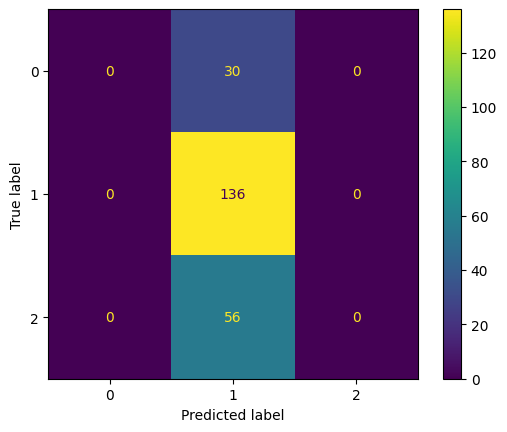

In [51]:
ConfusionMatrixDisplay.from_predictions(
    comparativo['label'],
    comparativo['predicted']
    )

In [52]:
trainer.save_model('finbert-sentiment/')

In [53]:
log_loss(
    np.asarray(comparativo.label),
    np.asarray(softmax(y_pred, axis=1)))

NameError: name 'softmax' is not defined

# REFERENCES

- Paper: https://arxiv.org/pdf/1908.10063.pdf
- https://github.com/yya518/FinBERT/blob/master/finetune.ipynb
- https://huggingface.co/yiyanghkust/finbert-tone
- https://www.tensorflow.org/text/tutorials/classify_text_with_bert

- Paper with code: http://nlp.seas.harvard.edu/annotated-transformer/